In [4]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow.keras.layers import Dense, Dropout , Input , Flatten, concatenate , Conv2D, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model


In [7]:
"""MNIST dataset"""
(S_train, y_train), (S_test, y_test) = mnist.load_data()
"""Compute the number of labels"""
num_labels = len(np.unique(y_train))


"""One hot encode""" 
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

"""reshape and normalize input images"""
image_size = S_train.shape[1]
S_train = np.reshape(S_train,[-1, image_size, image_size, 1])
S_test = np.reshape(S_test,[-1, image_size, image_size, 1])
S_train = S_train.astype('float32') / 255
S_test = S_test.astype('float32') / 255

"""Hyper Parameters"""
input_shape = (image_size, image_size, 1)
batch_size = 32
kernel_size =3
dropout = 0.4
n_filters = 32

"""
Now we are creating a Y network 2 Inputs and 1 output -a y_net with two branches"""


"""Left Branch"""
left_inputs = Input(shape= input_shape)
S = left_inputs
filters = n_filters

"""
Create 3 layers of Conv2D , Dropout,and Maxpooling2D  and after every loop double the filters
"""
for i in range(3):
    S = Conv2D(filters = filters,kernel_size = kernel_size,padding = 'same', activation = 'relu')(S)
    S = Dropout(dropout)(S)
    S = MaxPooling2D()(S)
    filters *= 2
    
"""Right Branch"""
right_inputs = Input(shape = input_shape)
y = right_inputs
filters = n_filters
"""
Create 3 layers of Conv2D , Dropout,and Maxpooling2D  and after every loop double the filters
"""
for i in range(3):
    y = Conv2D(filters = filters,kernel_size = kernel_size,padding = 'same', 
               activation = 'relu',dilation_rate =2)(y)
    y = Dropout(dropout)(y)
    y = MaxPooling2D()(y)
    filters *= 2
    
"""Combine both segments"""
y = concatenate([S,y])

"""Output"""
y = Flatten()(y)
y = Dropout(dropout)(y)
outputs = Dense(num_labels , activation = 'softmax')(y)



Y_Net = Model(inputs = [left_inputs, right_inputs], outputs = outputs)

plot_model(Y_Net, to_file='Y_Net.png', show_shapes=True)
Y_Net.summary()

Y_Net.compile(loss='categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

hist = Y_Net.fit([S_train, S_train],
             y_train,
             validation_data=([S_test, S_test], y_test),
             epochs=15,
             batch_size=batch_size)


score = Y_Net.evaluate([S_test, S_test],
                          y_test,
                          batch_size=batch_size,
                          verbose=2)

print("\nTest accuracy: %.3f%%" % (100.0 * score[1]))

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 28, 28, 32)   320         input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_9 (Conv2D)               (None, 28, 28, 32)   320         input_4[0][0]                    
____________________________________________________________________________________________

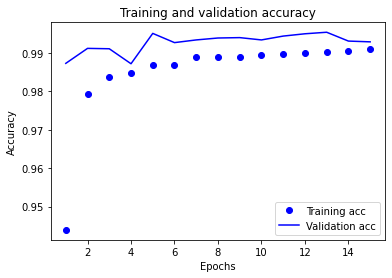

In [10]:
plt.clf()
epochs = range(1, len(loss) + 1)
acc = hist.history["accuracy"]
val_acc = hist.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

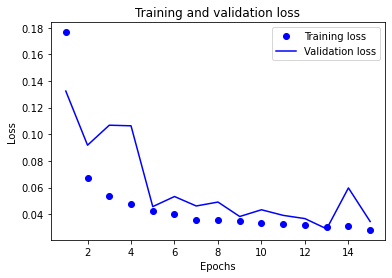

In [9]:
loss = hist.history["loss"]
val_loss = hist.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()